In [1]:
from ssrs import HRRR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/akey/anaconda3/envs/ssrs_env/lib/python3.10/site-packages/herbie/archive.py:71: UserWarning: herbie xarray accessors could not be imported.You are probably missing the Carpenter_Workshop.If you want to use these functions, try`pip install git+https://github.com/blaylockbk/Carpenter_Workshop.git`
  warnings.warn(


## Read the csv to be annotated

In [2]:
df = pd.read_csv('totw_04_02_2019.csv')

## Parse the time stamps and calculate height above ground.

Assume they are in US/Mountain time.

In [3]:
df['timestamp'] = pd.to_datetime(df['Time']).dt.tz_localize('US/Mountain')
df['height_above_ground_m'] = df['Altitude'] - df['GroundElevation']
df.head()

,AnimalID,Time,Latitude,Longitude,Speed,Heading,Altitude,Season,NumSats,VDOP,...,GroundAspect,ClosestTurbineX,ClosestTurbineY,ClosestTurbineLongitude,ClosestTurbineLatitude,ClosestTurbineRotorDia,ClosestTurbineHubHgt,ClosestTurbineHdistance,timestamp,height_above_ground_m
0,586,4/2/2019 11:43:53,42.955555,-105.811447,18.494278,290.0,2223.0,ResidentW,10,1.2,...,256.849871,-750608.443926,388050.667254,-105.80429,42.9568,101.0,80.0,568.298920,2019-04-02 11:43:53-06:00,568.402377
1,586,4/2/2019 11:43:50,42.955376,-105.810806,19.600333,292.0,2228.0,ResidentW,10,1.2,...,343.928352,-750608.443926,388050.667254,-105.80429,42.9568,101.0,80.0,527.335685,2019-04-02 11:43:50-06:00,569.203135
2,586,4/2/2019 11:43:47,42.955147,-105.810097,21.030489,294.0,2234.0,ResidentW,10,1.2,...,232.573059,-750608.443926,388050.667254,-105.80429,42.9568,101.0,80.0,486.346142,2019-04-02 11:43:47-06:00,568.800342
3,586,4/2/2019 11:43:44,42.954922,-105.809387,20.526333,284.0,2242.0,ResidentW,10,1.2,...,205.188189,-750608.443926,388050.667254,-105.80429,42.9568,101.0,80.0,449.545182,2019-04-02 11:43:44-06:00,578.035510
4,586,4/2/2019 11:43:41,42.954826,-105.808685,18.468556,277.0,2247.0,ResidentW,10,1.2,...,206.820295,-750608.443926,388050.667254,-105.80429,42.9568,101.0,80.0,409.951167,2019-04-02 11:43:41-06:00,580.816503


Box plot the distribution of heights above ground as sanity check.

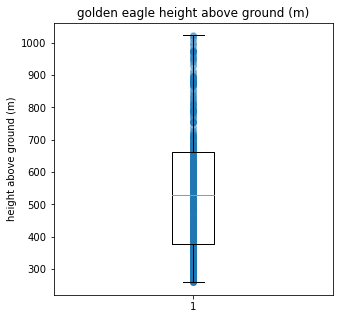

In [4]:
xs = range(len(df))
ys = df['height_above_ground_m']
fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot(ys)
ax.set_title('golden eagle height above ground (m)')
ax.set_ylabel('height above ground (m)')
ax.scatter(np.ones(len(df)), ys, alpha=0.25)

This looks good given typical behavior of golden eagles. Negative values are outliers that can be treated as being at ground level.

## Calculate the wind speed and direction for this sample

And put it in as columns in the data frame!

In [5]:
wind_speeds = []
wind_directions = []
wind_us = []
wind_vs = []

hrrr_objects = {}

for i, (_, row) in enumerate(df.iterrows()):
    print(f'Row {i + 1} of {len(df)}')
    height_above_ground_m = row['Altitude']
    ground_level_m = row['GroundElevation']
    lon = row['Longitude']
    lat = row['Latitude']
    timestamp_utc = row['timestamp'].tz_convert('UTC')
    ymdh = f'{timestamp_utc.year}-{timestamp_utc.month}-{timestamp_utc.day} {timestamp_utc.hour}:00'
    if ymdh not in hrrr_objects:
        hrrr_objects[ymdh] = HRRR(ymdh)
    # %prun wind = hrrr_objects[ymdh].wind_velocity_direction_at_altitude(center_lonlat=(lon, lat), height_above_ground_m=height_above_ground_m, ground_level_m=ground_level_m)
    wind = hrrr_objects[ymdh].wind_velocity_direction_at_altitude(center_lonlat=(lon, lat), height_above_ground_m=height_above_ground_m, ground_level_m=ground_level_m)
    wind_speeds.append(wind['speed'])
    wind_directions.append(wind['direction_deg'])
    wind_us.append(str(wind['us']))
    wind_vs.append(str(wind['vs']))
    
wind_speeds = pd.Series(wind_speeds)
wind_directions = pd.Series(wind_directions)
wind_us = pd.Series(wind_us)
wind_vs = pd.Series(wind_vs)

df['WindSpeed'] = wind_speeds
df['WindDirection'] = wind_directions
# df['WindUs'] = wind_us
# df['WindVs'] = wind_vs

df.to_csv('wy_telemetry_with_wind.csv')

df.head()

Row 1 of 685
Using date
🏋🏻‍♂️ Found 2019-Apr-02 17:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
Row 2 of 685
Row 3 of 685
Row 4 of 685
Row 5 of 685
Row 6 of 685
Row 7 of 685
Row 8 of 685
Row 9 of 685
Row 10 of 685
Row 11 of 685
Row 12 of 685
Row 13 of 685
Row 14 of 685
Row 15 of 685
Row 16 of 685
Row 17 of 685
Row 18 of 685
Row 19 of 685
Row 20 of 685
Row 21 of 685
Row 22 of 685
Row 23 of 685
Row 24 of 685
Row 25 of 685
Row 26 of 685
Row 27 of 685
Row 28 of 685
Row 29 of 685
Row 30 of 685
Row 31 of 685
Row 32 of 685
Row 33 of 685
Row 34 of 685
Row 35 of 685
Row 36 of 685
Row 37 of 685
Row 38 of 685
Row 39 of 685
Row 40 of 685
Row 41 of 685
Row 42 of 685
Row 43 of 685
Row 44 of 685
Row 45 of 685
Row 46 of 685
Row 47 of 685
Row 48 of 685
Row 49 of 685
Row 50 of 685
Row 51 of 685
Row 52 of 685
Row 53 of 685
R

,AnimalID,Time,Latitude,Longitude,Speed,Heading,Altitude,Season,NumSats,VDOP,...,ClosestTurbineY,ClosestTurbineLongitude,ClosestTurbineLatitude,ClosestTurbineRotorDia,ClosestTurbineHubHgt,ClosestTurbineHdistance,timestamp,height_above_ground_m,WindSpeed,WindDirection
0,586,4/2/2019 11:43:53,42.955555,-105.811447,18.494278,290.0,2223.0,ResidentW,10,1.2,...,388050.667254,-105.80429,42.9568,101.0,80.0,568.298920,2019-04-02 11:43:53-06:00,568.402377,15.759670,333.770092
1,586,4/2/2019 11:43:50,42.955376,-105.810806,19.600333,292.0,2228.0,ResidentW,10,1.2,...,388050.667254,-105.80429,42.9568,101.0,80.0,527.335685,2019-04-02 11:43:50-06:00,569.203135,15.946293,334.102708
2,586,4/2/2019 11:43:47,42.955147,-105.810097,21.030489,294.0,2234.0,ResidentW,10,1.2,...,388050.667254,-105.80429,42.9568,101.0,80.0,486.346142,2019-04-02 11:43:47-06:00,568.800342,15.732794,333.727894
3,586,4/2/2019 11:43:44,42.954922,-105.809387,20.526333,284.0,2242.0,ResidentW,10,1.2,...,388050.667254,-105.80429,42.9568,101.0,80.0,449.545182,2019-04-02 11:43:44-06:00,578.035510,15.733367,333.732207
4,586,4/2/2019 11:43:41,42.954826,-105.808685,18.468556,277.0,2247.0,ResidentW,10,1.2,...,388050.667254,-105.80429,42.9568,101.0,80.0,409.951167,2019-04-02 11:43:41-06:00,580.816503,15.734125,333.735660


## Reload the created dataframe to analyze it.

In [6]:
df = pd.read_csv('wy_telemetry_with_wind.csv')
df.tail()

,Unnamed: 0,AnimalID,Time,Latitude,Longitude,Speed,Heading,Altitude,Season,NumSats,...,ClosestTurbineY,ClosestTurbineLongitude,ClosestTurbineLatitude,ClosestTurbineRotorDia,ClosestTurbineHubHgt,ClosestTurbineHdistance,timestamp,height_above_ground_m,WindSpeed,WindDirection
680,680,586,4/2/2019 11:09:37,42.915047,-105.808922,17.686600,79.0,1874.0,ResidentW,9,...,383988.054787,-105.79319,42.92299,101.0,80.0,1529.365398,2019-04-02 11:09:37-06:00,288.022657,15.775584,333.883364
681,681,586,4/2/2019 11:09:34,42.914940,-105.809601,19.764956,78.0,1881.0,ResidentW,9,...,383988.054787,-105.79319,42.92299,101.0,80.0,1578.418381,2019-04-02 11:09:34-06:00,294.276269,15.788547,333.864913
682,682,586,4/2/2019 11:09:31,42.914841,-105.810310,19.029300,81.0,1891.0,ResidentW,9,...,383988.054787,-105.79319,42.92299,101.0,80.0,1629.056008,2019-04-02 11:09:31-06:00,303.948536,15.783943,333.811767
683,683,586,4/2/2019 11:09:28,42.914803,-105.810966,17.979833,89.0,1899.0,ResidentW,9,...,383988.054787,-105.79319,42.92299,101.0,80.0,1672.518268,2019-04-02 11:09:28-06:00,311.646080,15.787032,333.829717
684,684,586,4/2/2019 11:09:25,42.914822,-105.811646,18.175322,90.0,1907.0,ResidentW,9,...,383988.054787,-105.79319,42.92299,101.0,80.0,1714.082849,2019-04-02 11:09:25-06:00,318.878021,15.785698,333.845334


## Plot the distribution of wind speeds and directions

Text(0.5, 0, 'wind direction')

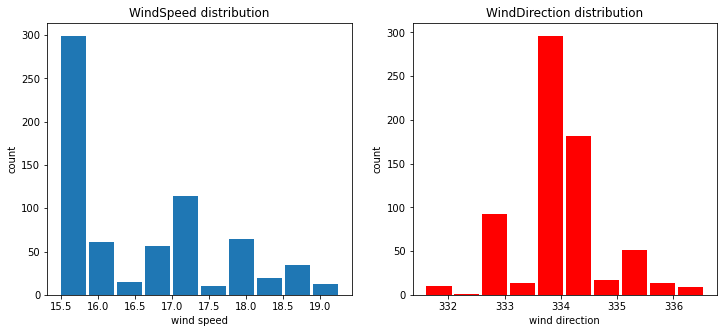

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axs[0].hist(df['WindSpeed'], rwidth=0.9)
axs[0].set_title('WindSpeed distribution')
axs[0].set_ylabel('count')
axs[0].set_xlabel('wind speed')

axs[1].hist(df['WindDirection'], rwidth=0.9, color='r')
axs[1].set_title('WindDirection distribution')
axs[1].set_ylabel('count')
axs[1].set_xlabel('wind direction')